# Cat butts

how and why they stink

Rather than reinventing the wheel with a large-scale effort to reconstruct 
the phylogeny of Carnivoria, we'll use one of the more recent published 
trees :

* Katrin Nyakatura and Olaf RP Bininda-Emonds, *Updating the evolutionary history of Carnivora (Mammalia): a new species-level supertree complete with divergence time estimates*, BMC Biology, 2012, [http://dx.doi.org/10.1186/1741-7007-10-12](http://dx.doi.org/10.1186/1741-7007-10-12)

Host trees are generated by pruning this tree to the relevant dataset.

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
import skbio

fecal_hosts = set()
for host in open('hosts/SpeciesListFecal.txt') :
    fecal_hosts.add(host.strip().replace('_',' '))

gland_hosts = set()
for host in open('hosts/SpeciesListAnalSac.txt') :
    gland_hosts.add(host.strip().replace('_',' '))    
    
tree = skbio.tree.TreeNode.read('hosts/carnivores.tree')

fecal_tree = tree.shear(fecal_hosts)
gland_tree = tree.shear(gland_hosts)

fecal_tree.write( 'hosts/carnivores_fecal.tree' )
gland_tree.write( 'hosts/carnivores_gland.tree' )

'hosts/carnivores_gland.tree'

In [125]:
from ete2 import Tree, TreeStyle, NodeStyle, TextFace
from numpy import linspace

ts = TreeStyle()
ts.mode = 'r'
#ts.mode = 'c'
ts.show_leaf_name = True
ts.branch_vertical_margin = 2
ts.scale = 1
ts.show_leaf_name = False
ts.show_scale = False

nstyle = NodeStyle()
nstyle['size'] = 0

### Host tree for available fecal samples

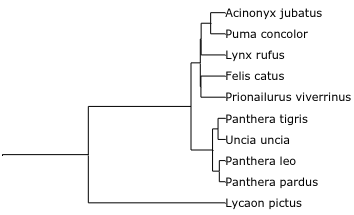

In [126]:
tree = Tree('hosts/carnivores_fecal.tree')

for node in tree.traverse() :
    node.set_style(nstyle)
    if node.is_leaf :
        tf = TextFace( node.name.replace('_',' ') )
        tf.fsize = 2.5
        tf.hz_align = 100
        node.add_face( tf, 0 )

tree.render("%%inline", w=100, units="mm", tree_style=ts)

### Host tree for available glad samples

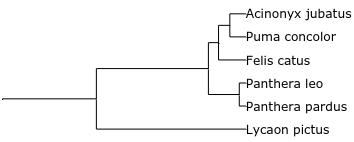

In [127]:
tree = Tree('hosts/carnivores_gland.tree')

for node in tree.traverse() :
    node.set_style(nstyle)
    if node.is_leaf :
        tf = TextFace( node.name.replace('_',' ') )
        tf.fsize = 2.5
        tf.hz_align = 100
        node.add_face( tf, 0 )
    
tree.render("%%inline", w=100, units="mm", tree_style=ts)

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame.from_csv( 'microbes/Metadata_Concatonated_Cats.txt', sep='\t' )
df.to_csv( 'microbes/mapping.tsv', sep='\t' )

In [8]:
fecal  = df[ df.SampleTypeEdited=='Fecal'  ][ df.Phylogenetic_study==1 ]
rectal = df[ df.SampleTypeEdited=='Rectal' ][ df.Phylogenetic_study==1 ]
anal   = df[ df.SampleTypeEdited=='Anal'   ][ df.Phylogenetic_study==1 ]

useless_cols = [ 'OldMappingFile', 'BarcodeSequence', 'LinkerPrimerSequence', 
                 'Phylogenetic_study', 'email', 'Kittybiome_participants', 
                 'Sample_storage_study', 'Treatment', 'Day', 'Description', 
                 'ng_ul', '4_ng_DNA', 'H2O_ul' ]

# data washing
common_names = set()
for study in [ fecal, rectal, anal ] :
    for col in useless_cols :
        del study[col]
    study['SampleType'] = study['SampleTypeEdited']
    del study['SampleTypeEdited']
    study['Species'] = study['Species'].apply( lambda x : x.strip() )
    study['Species'] = study['Species'].apply( lambda x : x.replace('.',' ') )
    study['Species'] = study['Species'].apply( lambda x : x.replace('African lion','Lion') )    
    for name in study['Species'] :
        common_names.add( name )

In [9]:
common_names

{'Bobcat',
 'Cheetah',
 'Domestic cat',
 'Fishing cat',
 'Leopard',
 'Lion',
 'Puma',
 'Snow leopard',
 'Sumatran tiger',
 'Wild dog'}

In [10]:
# Replace common names with species names

common_to_species = {'Bobcat'         : 'Lynx rufus',
                     'Cheetah'        : 'Acinonyx jubatus',
                     'Domestic cat'   : 'Felis catus',
                     'Fishing cat'    : 'Prionailurus viverrinus',
                     'Leopard'        : 'Panthera pardus', 
                     'Lion'           : 'Panthera leo',
                     'Puma'           : 'Puma concolor',
                     'Snow leopard'   : 'Panthera uncia',
                     'Sumatran tiger' : 'Panthera tigris',
                     'Wild dog'       : 'Lycaon pictus' }

for study in [ fecal, rectal, anal ] :
    study['CommonName'] = study['Species']
    study['Species'] = study['Species'].apply( lambda x : common_to_species[x] )

In [11]:
anal

,Demul_name,Run,Species,Name,SampleType,Sex,Feral,CommonName
#SampleID,,,,,,,,
A10.15,A102-15,Kittybiome102,Panthera leo,Shenzi,Anal,NaN,0,Lion
A100.15,A100-15,Kittybiome101,Acinonyx jubatus,Ruff,Anal,Male,0,Cheetah
A102.15,A108-15,Kittybiome102,Acinonyx jubatus,Ruff,Anal,Male,0,Cheetah
A108.15,A110-15,Kittybiome102,Acinonyx jubatus,Dash,Anal,Female,0,Cheetah
A110.15,A1-15,Kittybiome102,Acinonyx jubatus,Dash,Anal,Female,0,Cheetah
A113.15,A113-15,Kittybiome101,Acinonyx jubatus,Tumble,Anal,Male,0,Cheetah
A118.15,A118-15,Kittybiome101,Panthera pardus,Wahoo,Anal,Male,0,Leopard
A120.15,A120-15,Kittybiome101,Panthera pardus,Wahoo,Anal,Male,0,Leopard
A125.15,A125-15,Kittybiome101,Acinonyx jubatus,Nip,Anal,Female,0,Cheetah


In [12]:
# check to make sure none of the Demul_name's have '_' chars
# because we need to split on '_' to get the sample read groups
for study in [ anal, fecal, rectal ] :
    print filter( lambda x : '_' in x, study['Demul_name'] )

[]
[]
[]


In [ ]:
from screed import read_fasta_sequences, ScreedDB

print 'indexing records...'
read_fasta_sequences('data/Kitty_phylo.fa.gz')

In [14]:
study = anal

print 'building database...'
db = ScreedDB('data/Kitty_phylo.fa.gz')

building database...


In [18]:
from hat_trie import Trie

print 'building trie...'
trie = Trie()
for n,name in enumerate(db) :
    if n % 1000000 == 0 : print n
    demul_name, readnumber = name.split('_')
    if demul_name in study['Demul_name'] :
        seq = unicode(db[name].sequence)
        if not trie.__contains__(seq) : trie[seq] = []
        trie[seq].append(name)    

building trie...
0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
11700000
11800000
11900000
12000000
12100000


In [21]:
cutoff = 2

print 'writing uniqued records with at least ' + str(cutoff) + ' instances...'
with open('data/anal_sorted_2.fasta', 'w' ) as f1, \
     open('data/anal_sorted_2.txt', 'w' )   as f2 :
    for n,seq in enumerate(trie.keys()) :
        if n % 10000 == 0 : print n
        records = trie[seq]
        if len(records) >= cutoff :
            f1.write( '>' + records[0] + '\n' + seq + '\n' )
            f2.write( ','.join(records) + '\n' )

writing uniqued records with at least 2 instances...
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000


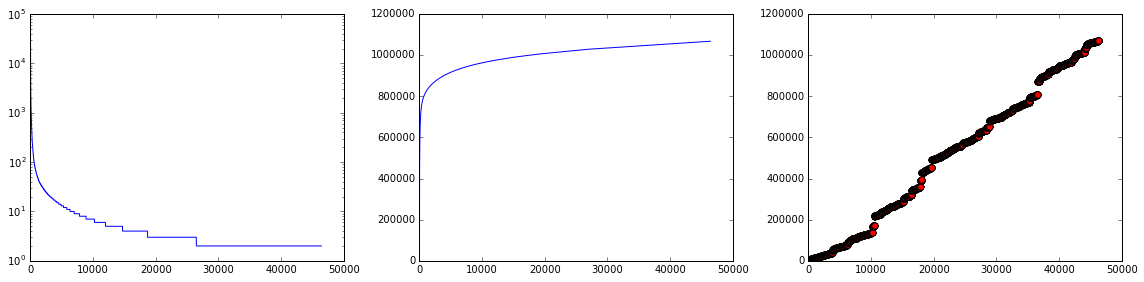

In [45]:
figure(figsize=(16, 4))

subplot(1,3,1)
observations = []
for line in open( 'data/anal_sorted_2.txt') :
    observations.append( len(line.strip().split(',')) )
plot(sorted(observations, reverse=True))
semilogy()

subplot(1,3,2)
total_obs = [0]
for n,obs in enumerate(sorted( observations, reverse=True )) :
    total_obs.append( total_obs[-1] + obs )
plot(total_obs)

subplot(1,3,3)
total = 0
totals = []
for line in open( 'data/anal_sorted_2.txt' ) :
    total = total + len(line.split(','))
    totals.append(total)
plot(totals, 'ro')

tight_layout()

In [25]:
!SSUALIGNDIR=/home/russell/opt/share/ssu-align-0.1 time ssu-align \
--dna --no-trunc data/anal_sorted_2.fasta alignments/ssu_anal

# ssu-align :: align SSU rRNA sequences
# SSU-ALIGN 0.1 (June 2010)
# Copyright (C) 2010 HHMI Janelia Farm Research Campus
# Freely distributed under the GNU General Public License (GPLv3)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# command: ssu-align --dna --no-trunc data/anal_sorted_2.fasta alignments/ssu_anal
# date:    Thu Feb  4 01:55:58 2016
#
# Validating input sequence file ... done.
#
# Stage 1: Determining SSU start/end positions and best-matching models...
#
# output file name           description                                
# -------------------------  -------------------------------------------
  ssu_anal.tab               locations/scores of hits defined by HMM(s)
  ssu_anal.archaea.hitlist   list of sequences to align with archaea CM
  ssu_anal.archaea.fa             44 sequences to align with archaea CM
  ssu_anal.bacteria.hitlist  list of sequences to align with bacteria CM
  ssu_anal.bacteria.fa         46359 sequences to align wit

In [52]:
# ssu-align produces Stockholm-formatted alignments, but
# RAxML can only read PHYLIP alignments. Unfortunately,
# Biopython can't write PHYLIP without truncating the names.
# So... we write alignment fasta...
with open('alignments/ssu_anal/ssu_anal.bacteria.align.fa', 'w') as f :
    for line in open( 'alignments/ssu_anal/ssu_anal.bacteria.stk' ) :
        if not line[0] == '#' and not line[0] == '/' and not line == '\n' :
            name,seq = line.strip().split()
            f.write( '>' + name + '\n' + seq + '\n' )

In [53]:
import screed
from screed import ScreedDB

# ...and then generate PHYLIP manually so so RAxML can read it
screed.read_fasta_sequences('alignments/ssu_anal/ssu_anal.bacteria.align.fa')
db = ScreedDB('alignments/ssu_anal/ssu_anal.bacteria.align.fa')
aligned_centroid_seqs = []
with open( 'alignments/ssu_anal/ssu_anal.bacteria.align.phylip', 'w' ) as f :
    f.write( str(len(db.keys())) + ' ' + str( len(db.items()[0][1]['sequence']) ) + '\n' )
    for otu in db.keys() :
        c = db[otu]
        aligned_centroid_seqs.append( c )
        # all aboard the derp-train...
        f.write( str(c.name) + ' ' + str(c.sequence) + '\n' )

In [56]:
!time /home/russell/pkg/standard-RAxML/raxmlHPC-PTHREADS-SSE3 \
-s alignments/ssu_anal/ssu_anal.bacteria.align.phylip         \
-n ssu_anal_bacteria.raxml                                    \
-m GTRGAMMA                                                   \
-T 16                                                         \
-p 314159

ERROR: Bad base (.) at site 1 of sequence 1
Printing error context:

59 2360
A178_19622 .....................

Problem reading alignment file 
Command exited with non-zero status 1
0.01user 0.10system 0:00.12elapsed 96%CPU (0avgtext+0avgdata 212348maxresident)k
0inputs+0outputs (0major+53136minor)pagefaults 0swaps
